본 코드는 아래 사이트의 내용을 참조 하였습니다. <br>
https://inuplace.tistory.com/515

다항선형회귀 : x의 갯수가 2개이상인 경우 <br>
y = w1*x1 + w2*x2 + w0

y = x^2 + w*x + c

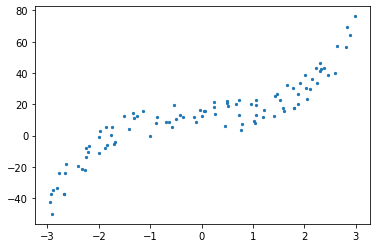

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
randNum = np.random.rand(n, 1)
x = 6  *randNum -3

y = 2 * x**3 + x + 2 + (np.random.rand(n, 1)*20)

plt.scatter(x, y, s=5)

위와 같은 데이터는 데이터의 분포가 곡선으로 나타나기 때문에 일반적인 선형회귀로 해결할 수 없다. (비선형)
따라서 PolynominalFeatures를 사용한다. PolynominalFeatures는 위의 그래프와 같이 데이터들간의 형태가 비선형 일때 데이터에 각 특성의 제곱항들을 추가해주어서 특성이 추가된 비선형 데이터를 **다항 회귀 모델**로 훈련시키는 방법이다.
<br>

Feature가 2개인 경우를 생각해 보자. 일반적은 다중 선형 모델일 경우 아래와 같을 것이다. <br>
$$y=w_{1}*x_{1}+w_{2}*x_{2} + w_{0} $$
<br>

이를 PolynominalFeatures를 활용할 경우, 아래와 같은 Feature를 추가해 주기 때문에 2차 함수의 모델을 만들어 낼 수 있다. <br>
 $$ x_{1}^2, x_{2}^2, x_{1}*x_{2} $$  <br>
$$y=w_{1}*x_{1}^2+w_{2}*x_{2}^2+w_{3}*x_{1}*x_{2}+w_{4}*x_{1}+w_{5}*x_{2} + w_{0} $$

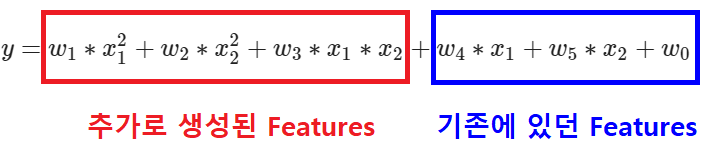

* PolynomialFeatures함수를 통해 현재 데이터를 다항식 형태로 변경한다. (각 특성의 제곱 혹은 그 이상을 추가)
* degree 옵션으로 차수를 조절한다.
* include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.
* 이렇게 만들어진 다항식 모델에 x를 fit transform하여 새로운 데이터를 생성한다.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# 입력 Feature를 2차함수로 생성하기 위해 2차항 추가
poly_features = PolynomialFeatures(degree=3, include_bias=False) # 기본 다항식형태를 만들고
x_poly = poly_features.fit_transform(x)
# 새롭게 정의된 numpy 배열은 행별로 각 데이터를 다항 형태로 변형해준다

In [5]:
# x[0]을 출력
print(x[0])

# x[0]항과 x[0]^2 제곱항을 출력
print(x_poly[0])

[-0.49741719]
[-0.49741719  0.24742386 -0.12307288]


In [ ]:
x, x_poly

(array([[-1.36726346e+00],
        [-1.14513705e-01],
        [-7.46672288e-01],
        [ 4.61957912e-01],
        [-2.44764289e+00],
        [ 1.62697492e+00],
        [ 1.57261622e-01],
        [ 3.76049271e-01],
        [-2.92493389e+00],
        [-8.58967055e-01],
        [ 6.26130992e-01],
        [ 4.97715675e-01],
        [-2.86487696e+00],
        [ 2.83212564e+00],
        [-5.10715197e-02],
        [-2.12277556e+00],
        [ 1.92820748e+00],
        [ 2.06918468e+00],
        [-1.97279616e+00],
        [-1.02578855e+00],
        [ 5.05363834e-01],
        [ 2.16861913e+00],
        [-1.53669448e+00],
        [-2.26413177e+00],
        [-1.59409972e-01],
        [ 5.25852842e-01],
        [-1.21134409e-01],
        [ 5.14143090e-01],
        [ 1.86141901e+00],
        [ 6.54637518e-01],
        [-2.34185234e+00],
        [-2.89590655e+00],
        [ 2.90100004e+00],
        [-6.41735651e-01],
        [-6.91099106e-01],
        [ 2.56522821e+00],
        [-8.51778704e-01],
 

In [6]:
# 만약 입력되는 x에 PolynomialFeatures함수를 거쳐서 입력하면 모델의 차수를 조정해서 모델링을 할 수 있다.

from sklearn.linear_model import LinearRegression
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y) # 다항회귀 모델에 그렇게 변형한 데이터와 기존 y값을 넣고 학습시킨다.

LinearRegression()

In [7]:
model.coef_

array([[ 0.2146397 , -0.07886337,  2.14813816]])

## PipeLine 생성

In [9]:
# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline   

model_lr = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                         LinearRegression())
model_lr.fit(x, y)
print(model_lr.steps[1][1].coef_)

[[ 0.2146397  -0.07886337  2.14813816]]


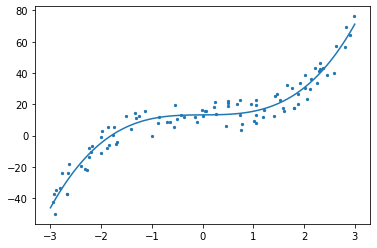

In [10]:
# 다항회귀 그래프
xx = np.linspace(-3, 3, 100)
y_pred = model_lr.predict(xx[:, np.newaxis])
plt.plot(xx, y_pred)
plt.scatter(x, y, s=5)